* Topic modeling approaches
- LDA, PMI: https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2



In [1]:
# !pip install top2vec
#!pip install top2vec[sentence_encoders]
#!pip install top2vec[indexing]

In [2]:
import os
import pandas as pd
import numpy as np
from top2vec import Top2Vec



In [4]:
input_dir = './data/input/'
output_dir = './data/output/topic_model/'

In [5]:
df = pd.read_csv(input_dir+'BurstingStudy_DailyData_02_15_2021.csv')
df

,ID,time_sent,time_complete,date_sent,date_complete,survey_numb,day_study,Daily_SI_DesireKill,Daily_SI_Urge,Daily_SI_Intent,...,Daily_Impul_ActEmotions,Daily_Impul_Impulse,Daily_Impul_Irrespon,Daily_Impul_Dangerous,Daily_Impul_Ate,Daily_SocialSupport_Family,Daily_SocialSupport_Friends,Daily_SI_Desire_Tomorrow,Daily_SI_Urge_Tomorrow,Daily_SI_ResistUrge_Tomorrow
0,107,2020-06-30 02:00:00,2020-06-30 03:23:46,2020-06-30,2020-06-30,1,0,7.0,7.0,8,...,4,4.0,4,2,1.0,NaN,NaN,NaN,NaN,NaN
1,107,2020-07-01 02:00:00,2020-07-01 05:21:53,2020-07-01,2020-07-01,2,1,10.0,10.0,7,...,4,4.0,4,2,0.0,NaN,NaN,NaN,NaN,NaN
2,107,2020-07-03 02:00:00,2020-07-03 02:44:33,2020-07-03,2020-07-03,3,3,10.0,10.0,10,...,4,4.0,4,4,0.0,NaN,NaN,NaN,NaN,NaN
3,107,2020-07-12 02:00:00,2020-07-12 06:41:33,2020-07-12,2020-07-12,4,12,10.0,10.0,10,...,4,4.0,4,4,4.0,NaN,NaN,NaN,NaN,NaN
4,107,2020-07-14 02:00:00,2020-07-14 05:15:46,2020-07-14,2020-07-14,5,14,6.0,6.0,4,...,3,3.0,2,2,3.0,NaN,NaN,NaN,NaN,NaN
5,107,2020-07-19 02:00:00,2020-07-19 02:04:40,2020-07-19,2020-07-19,6,19,7.0,5.0,5,...,4,4.0,4,4,4.0,NaN,NaN,5.0,5.0,5.0
6,124,2020-07-24 21:00:00,2020-07-24 21:38:10,2020-07-24,2020-07-24,4,3,0.0,0.0,0,...,4,3.0,2,4,3.0,NaN,NaN,3.0,7.0,3.0
7,124,2020-07-31 21:00:00,2020-07-31 21:02:11,2020-07-31,2020-07-31,9,10,0.0,0.0,2,...,2,3.0,1,2,3.0,NaN,NaN,2.0,3.0,7.0
8,124,2020-08-07 21:00:00,2020-08-07 22:29:44,2020-08-07,2020-08-07,14,17,1.0,0.0,0,...,2,1.0,3,2,3.0,NaN,NaN,1.0,4.0,8.0
9,124,2020-07-22 21:00:00,2020-07-22 21:58:23,2020-07-22,2020-07-22,2,1,0.0,0.0,0,...,2,0.0,1,1,3.0,NaN,NaN,2.0,4.0,3.0


In [124]:
cutoff = 3
text = df.dropna(subset=['Daily_SI_DesireKill']).dropna().SI_DescribeText.tolist()


high = df[df['Daily_SI_DesireKill']>=cutoff].dropna().SI_DescribeText.tolist()
low = df[df['Daily_SI_DesireKill']<cutoff].dropna().SI_DescribeText.tolist()
print(len(high),len(low))

952 928


In [125]:
from collections import OrderedDict
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
# od = OrderedDict([("cat", "dog"), ("dog", "pig")])
# my_sentence = "This is my cat and this is my dog."
# replace_all(my_sentence, od)
# print(my_sentence)



from nltk.corpus import stopwords
def remove_stopwords(doc, sw = 'nltk'):
    # nltk by default
    if sw == 'nltk':
        sw = stopwords.words("english")
    doc_wo_stopwords = ' '.join([token for token in doc.split(' ') if token not in sw])
    return doc_wo_stopwords

def clean(docs):
    od = OrderedDict([
        ("None", "none"),
        ("nine", "none"),
        ("na", "none"),
    ])
    docs = [replace_all(str(n), od) for n in docs]
    remove_these = ['none']
    docs = [n for n in docs if n not in remove_these]
    

    docs = [remove_stopwords(doc, sw = 'nltk') for doc in docs]
    
#     df['SI_DescribeText'] = df['SI_DescribeText'].replace('no_answer', 'skipped') 
# df['SI_DescribeText'] = df['SI_DescribeText'].replace('None', 'none') 
# df['SI_DescribeText'] = df['SI_DescribeText'].replace('nine', 'none') #consider this a typo
    return docs


# Top2Vec

In [131]:
# low
docs_clean

['suicidal thoughts, hearing Ruth Bader Ginsburg passing really hard hear I needed take persononel time pull together.  It good day then.',
 'hopeless, release, guilt',
 'pressure.  trying, takes two make relationship work.',
 'married lonely.  I always wrong. Dont ask wrong really asking wrong offended.  Stuck.',
 'incompatible. limits?',
 'stuck.  worth stress. I problems others dont seem have.',
 'physical/ mental health issues stress triggered intrusive thoughts',
 'brief',
 "I thought wanting I got online went grief group joined didn't think rest day. much suicide feeling wishing I could brother. ",
 'At one point afternoon  I trying find something phone. I found something I written brother time last year. I got overwhelmed grief sadness.. I wanted brother wanted see him. I thought taking life joining him. Not long though husband Rd crying c listened. helped. ',
 'I overwhelmed loss brother finonences due CoVid thought I wish I could disappear anymore.',
 'I thoughts  wishing coul

In [135]:
docs_clean = clean(text)
docs_clean

['overdosing',
 'I thought different ways end life',
 "I wished I didn't exist",
 'suicidal thoughts, hearing Ruth Bader Ginsburg passing really hard hear I needed take persononel time pull together.  It good day then.',
 'hopeless, release, guilt',
 'pressure.  trying, takes two make relationship work.',
 'married lonely.  I always wrong. Dont ask wrong really asking wrong offended.  Stuck.',
 'incompatible. limits?',
 'stuck.  worth stress. I problems others dont seem have.',
 'overdose',
 'reoccurring overdoses',
 'overdose',
 'overdose',
 'driving car tree',
 'another overdose birthday',
 'â\x80\x9cjust it, lifeâ\x80\x99s going get worseâ\x80\x9d',
 'physical/ mental health issues stress triggered intrusive thoughts',
 'brief',
 "I thought wanting I got online went grief group joined didn't think rest day. much suicide feeling wishing I could brother. ",
 'At one point afternoon  I trying find something phone. I found something I written brother time last year. I got overwhelmed gr

In [133]:
# https://top2vec.readthedocs.io/en/latest/api.html
# for docs in [low, high]:

model = Top2Vec(docs_clean, 
                embedding_model='doc2vec', #doc2vec is faster
               speed="deep-learn", #fast-learn, learn, deep-learn, deeplearn is better but slower 
                workers=16) #default: train doc2vec from scratch, good for large datasets
# model.save("filename")
# model = Top2Vec.load("filename")

num_topics = model.get_num_topics()
topic_sizes, topic_nums = model.get_topic_sizes()
print(num_topics, topic_sizes, topic_nums)

# for topic in topic_nums:
#     model.generate_topic_wordcloud(topic)


2021-05-10 14:50:54,809 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-05-10 14:50:54,826 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


RuntimeError: you must first build vocabulary before training the model

6 [233 217 193 183 178 176] [0 1 2 3 4 5]


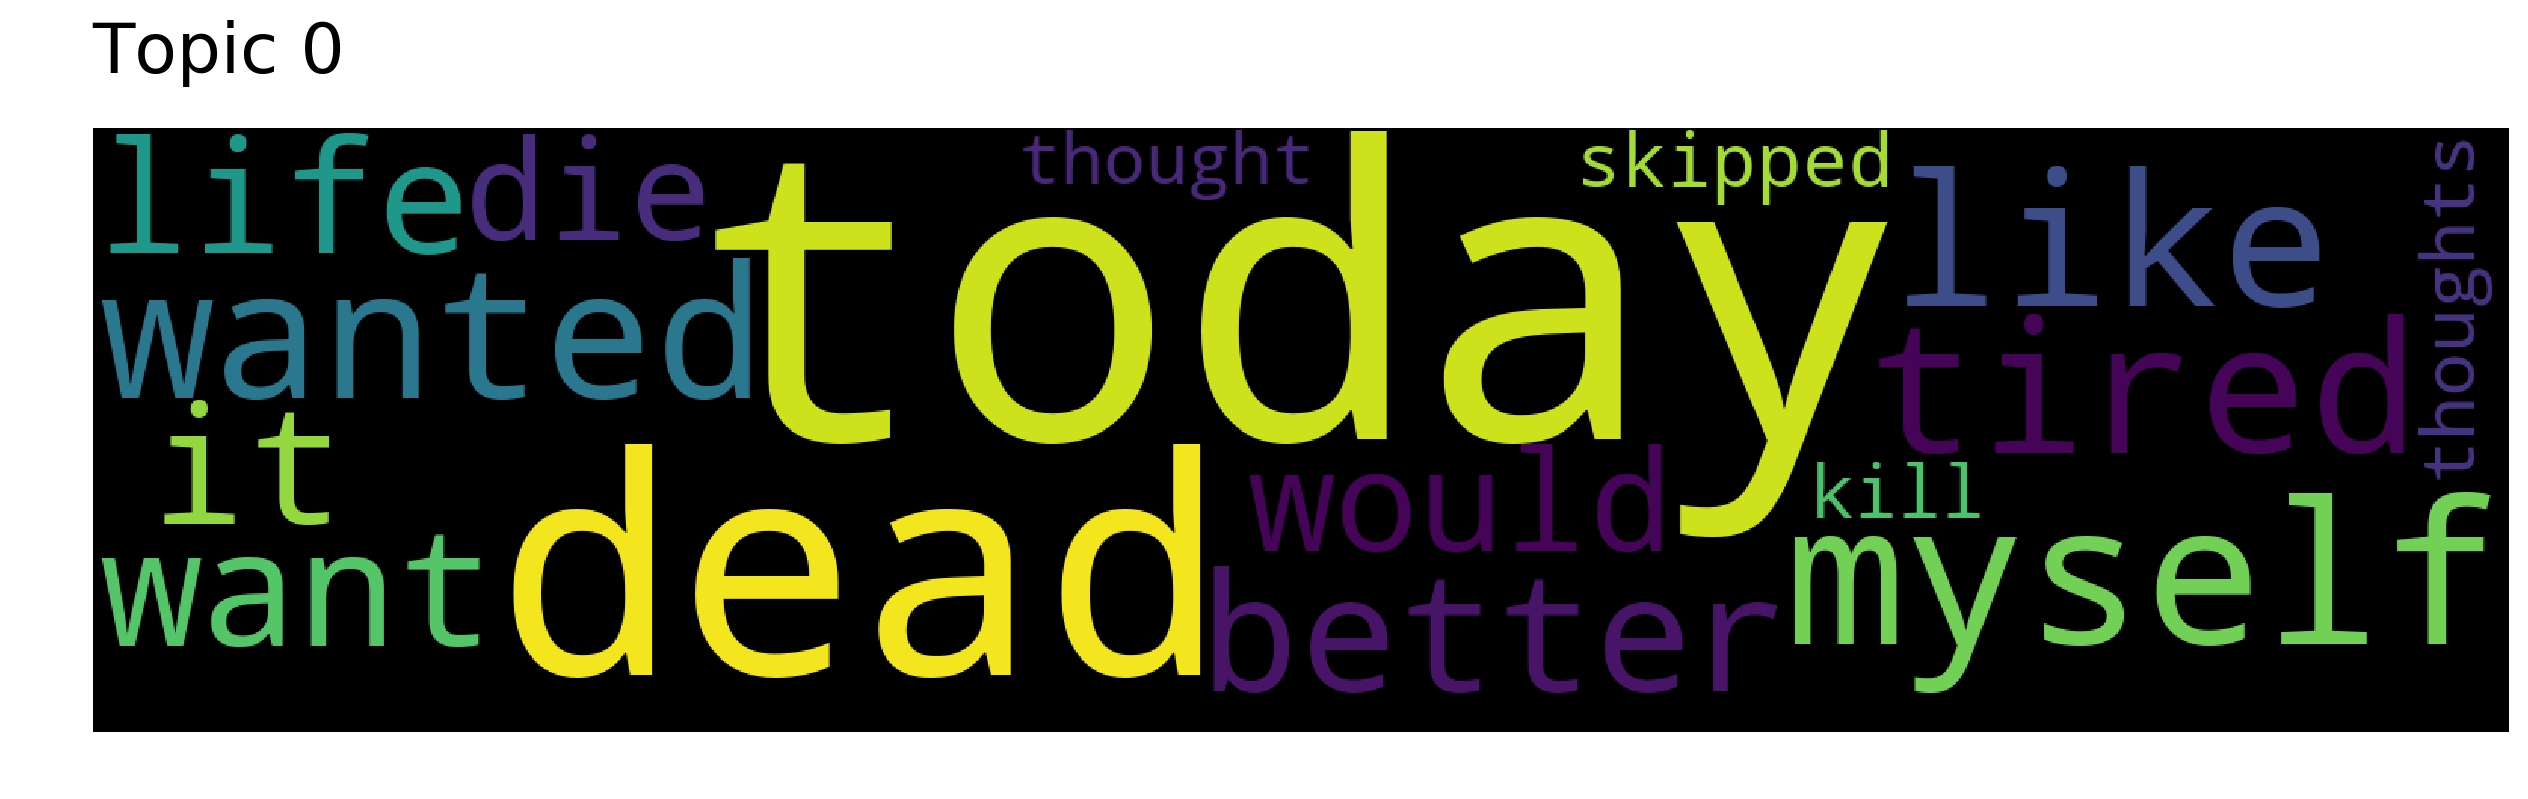

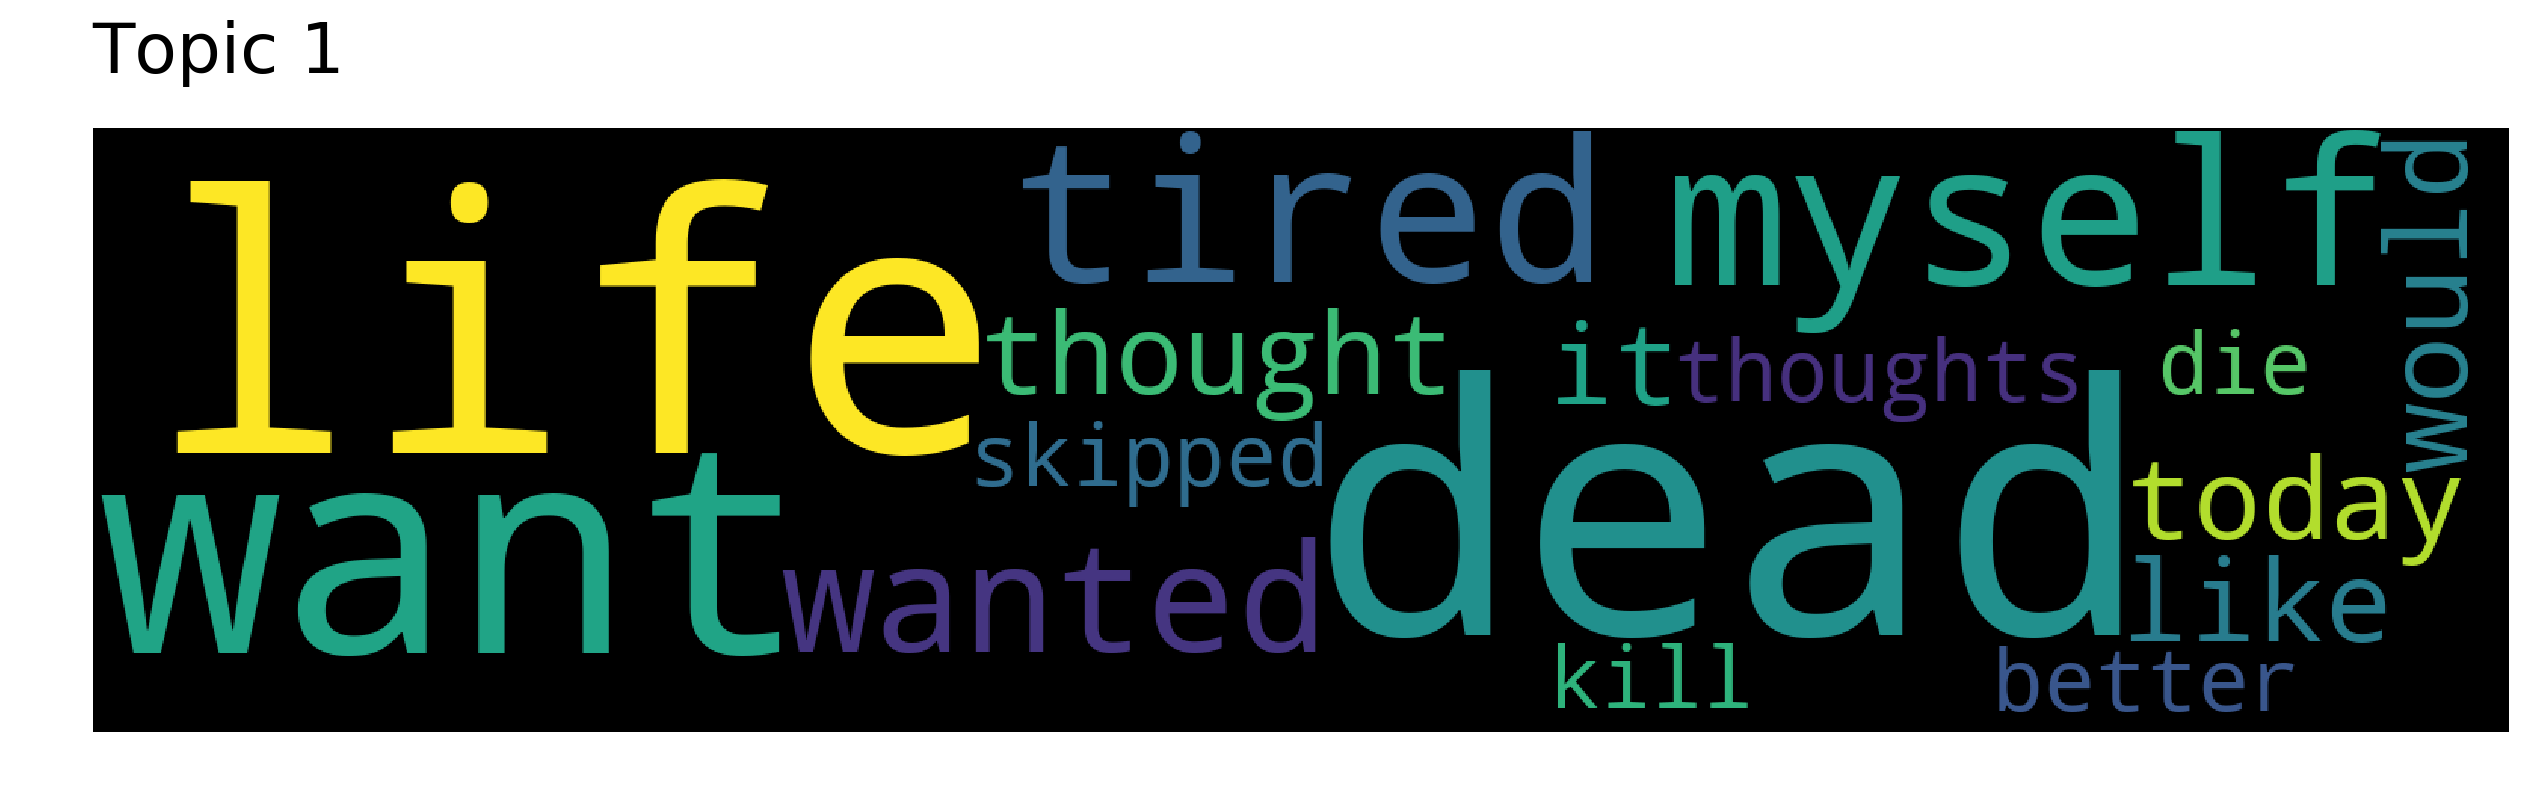

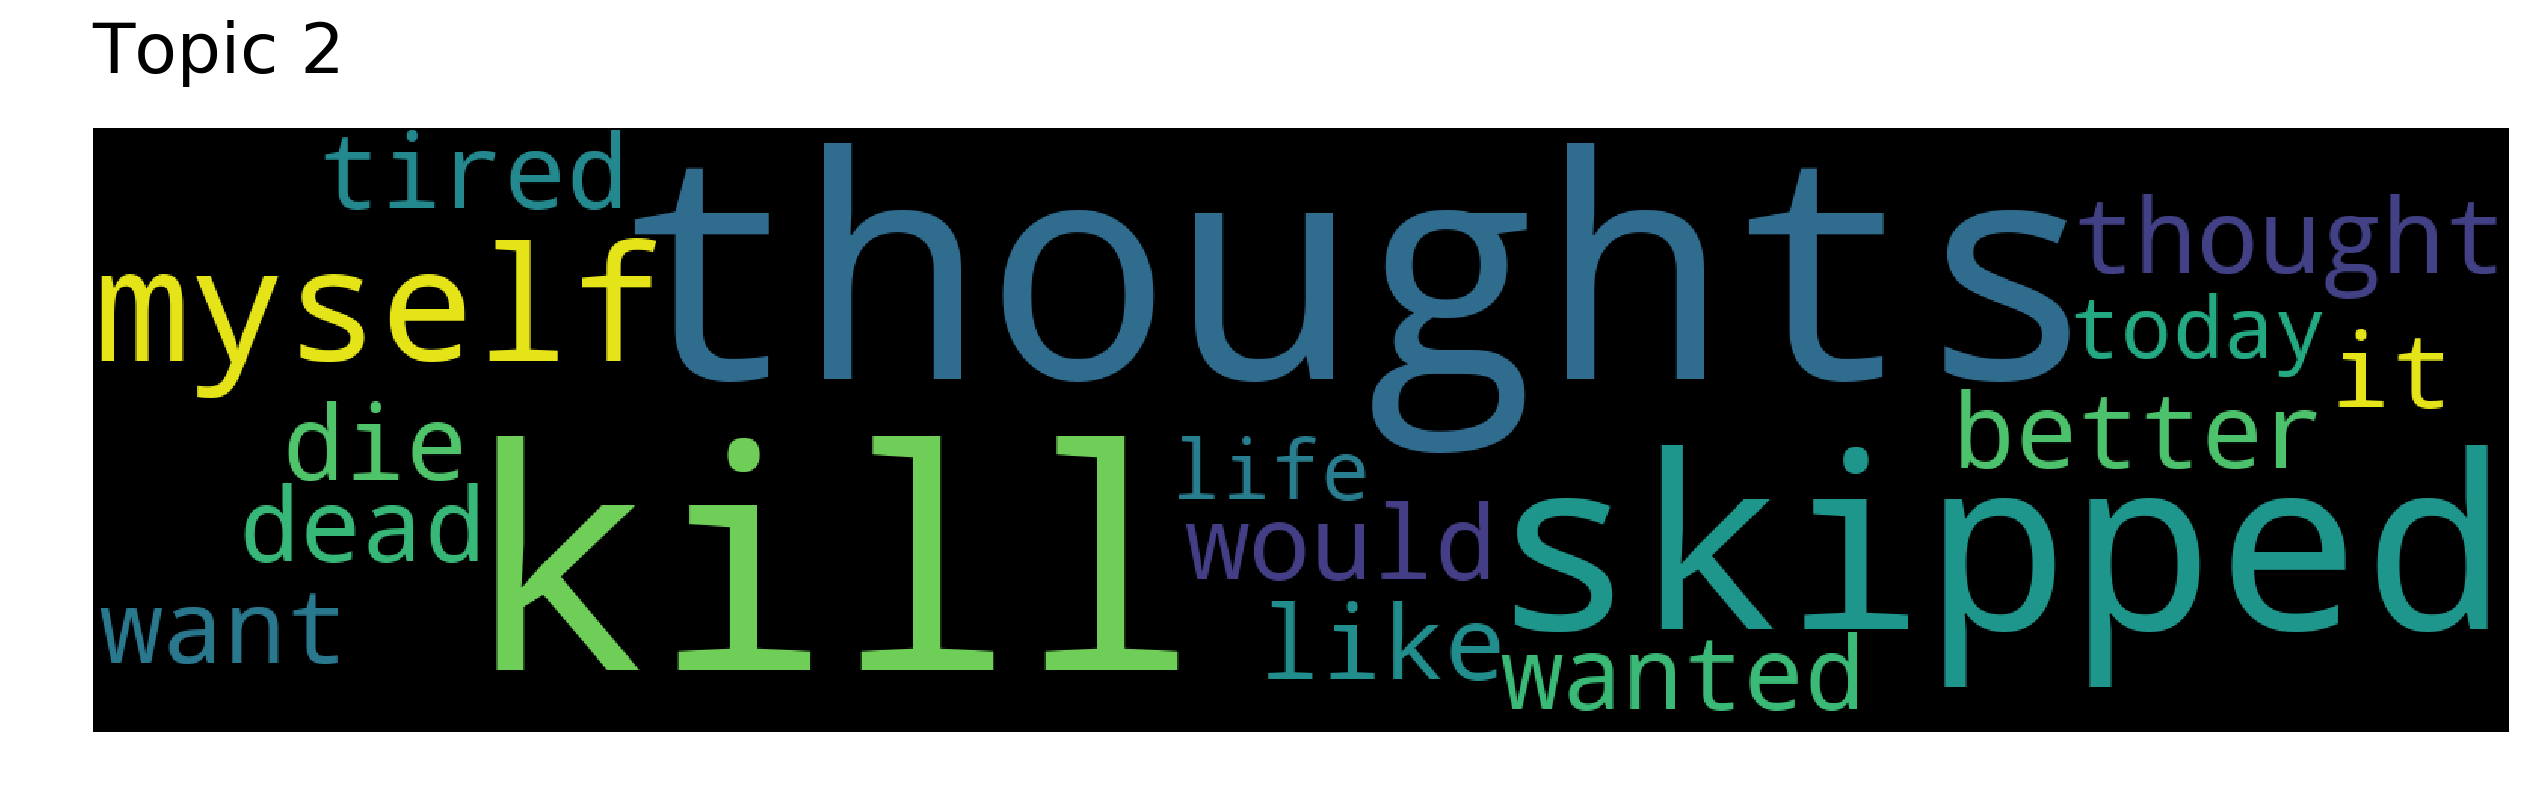

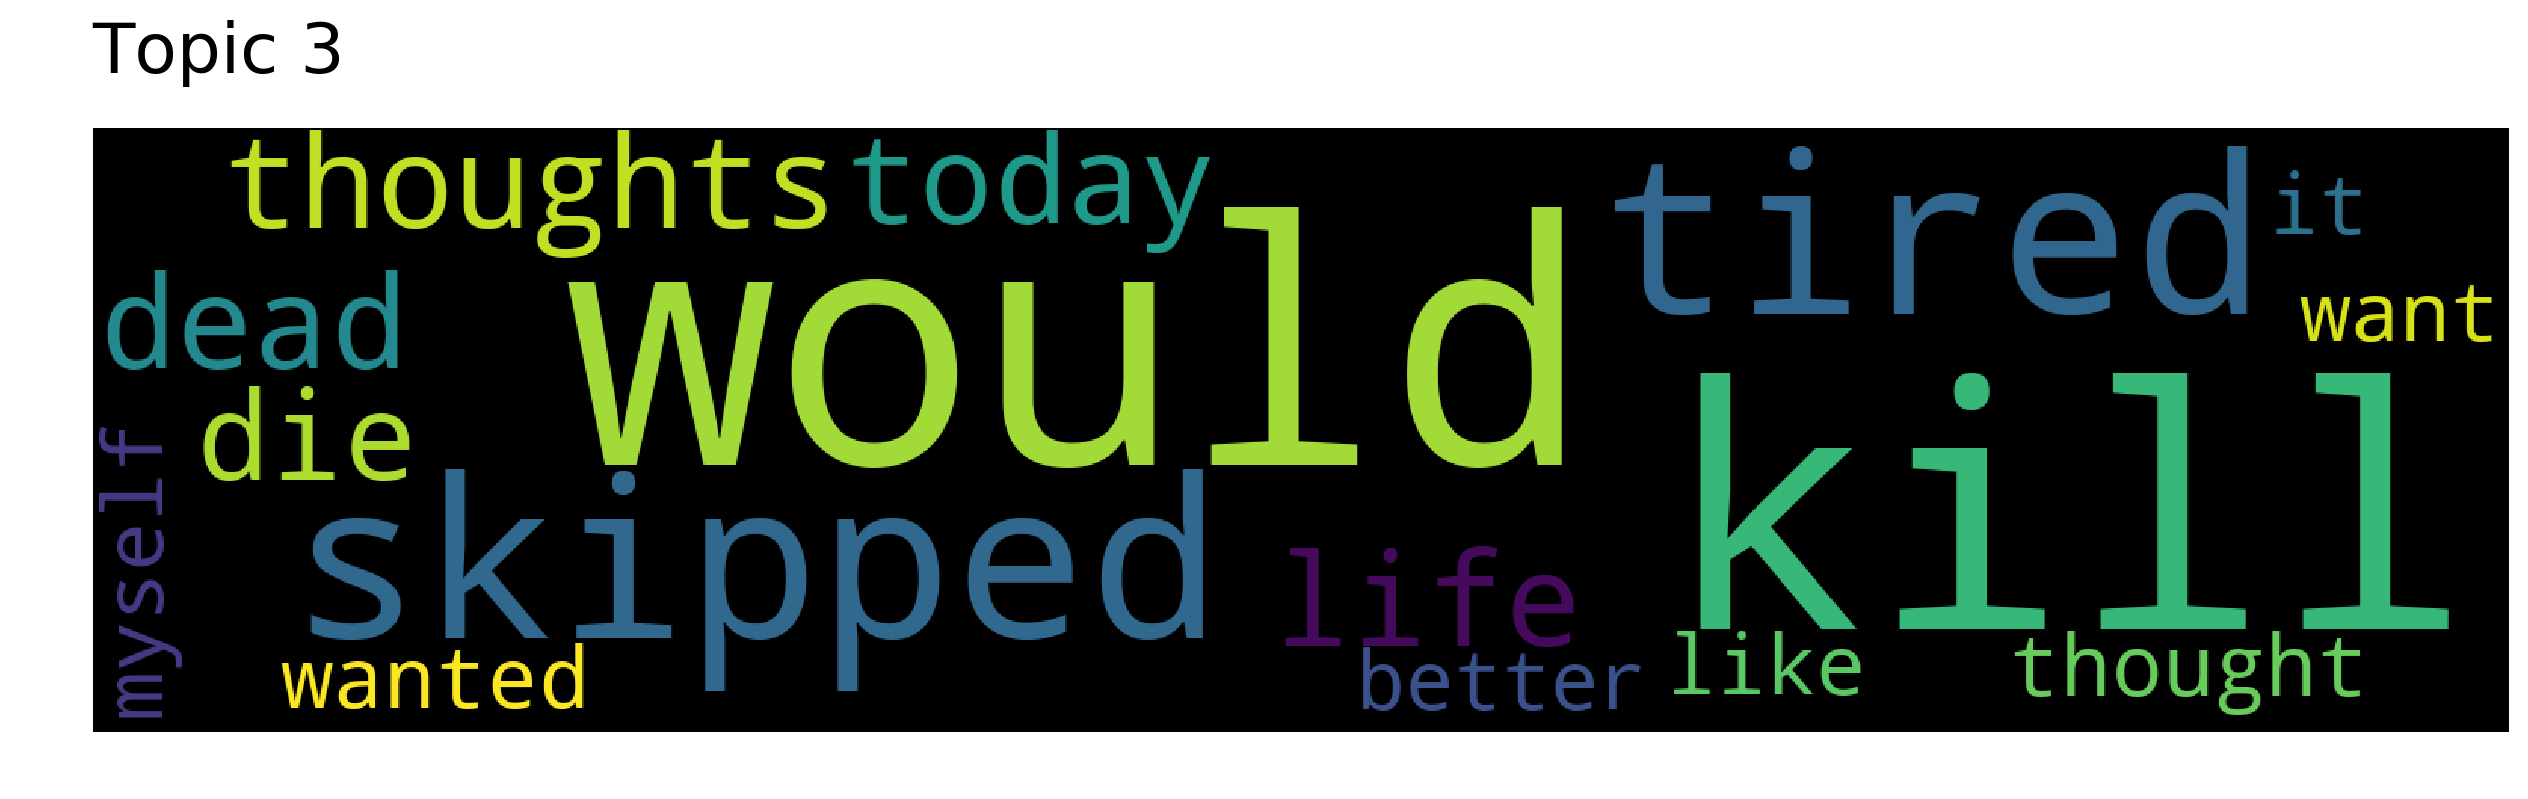

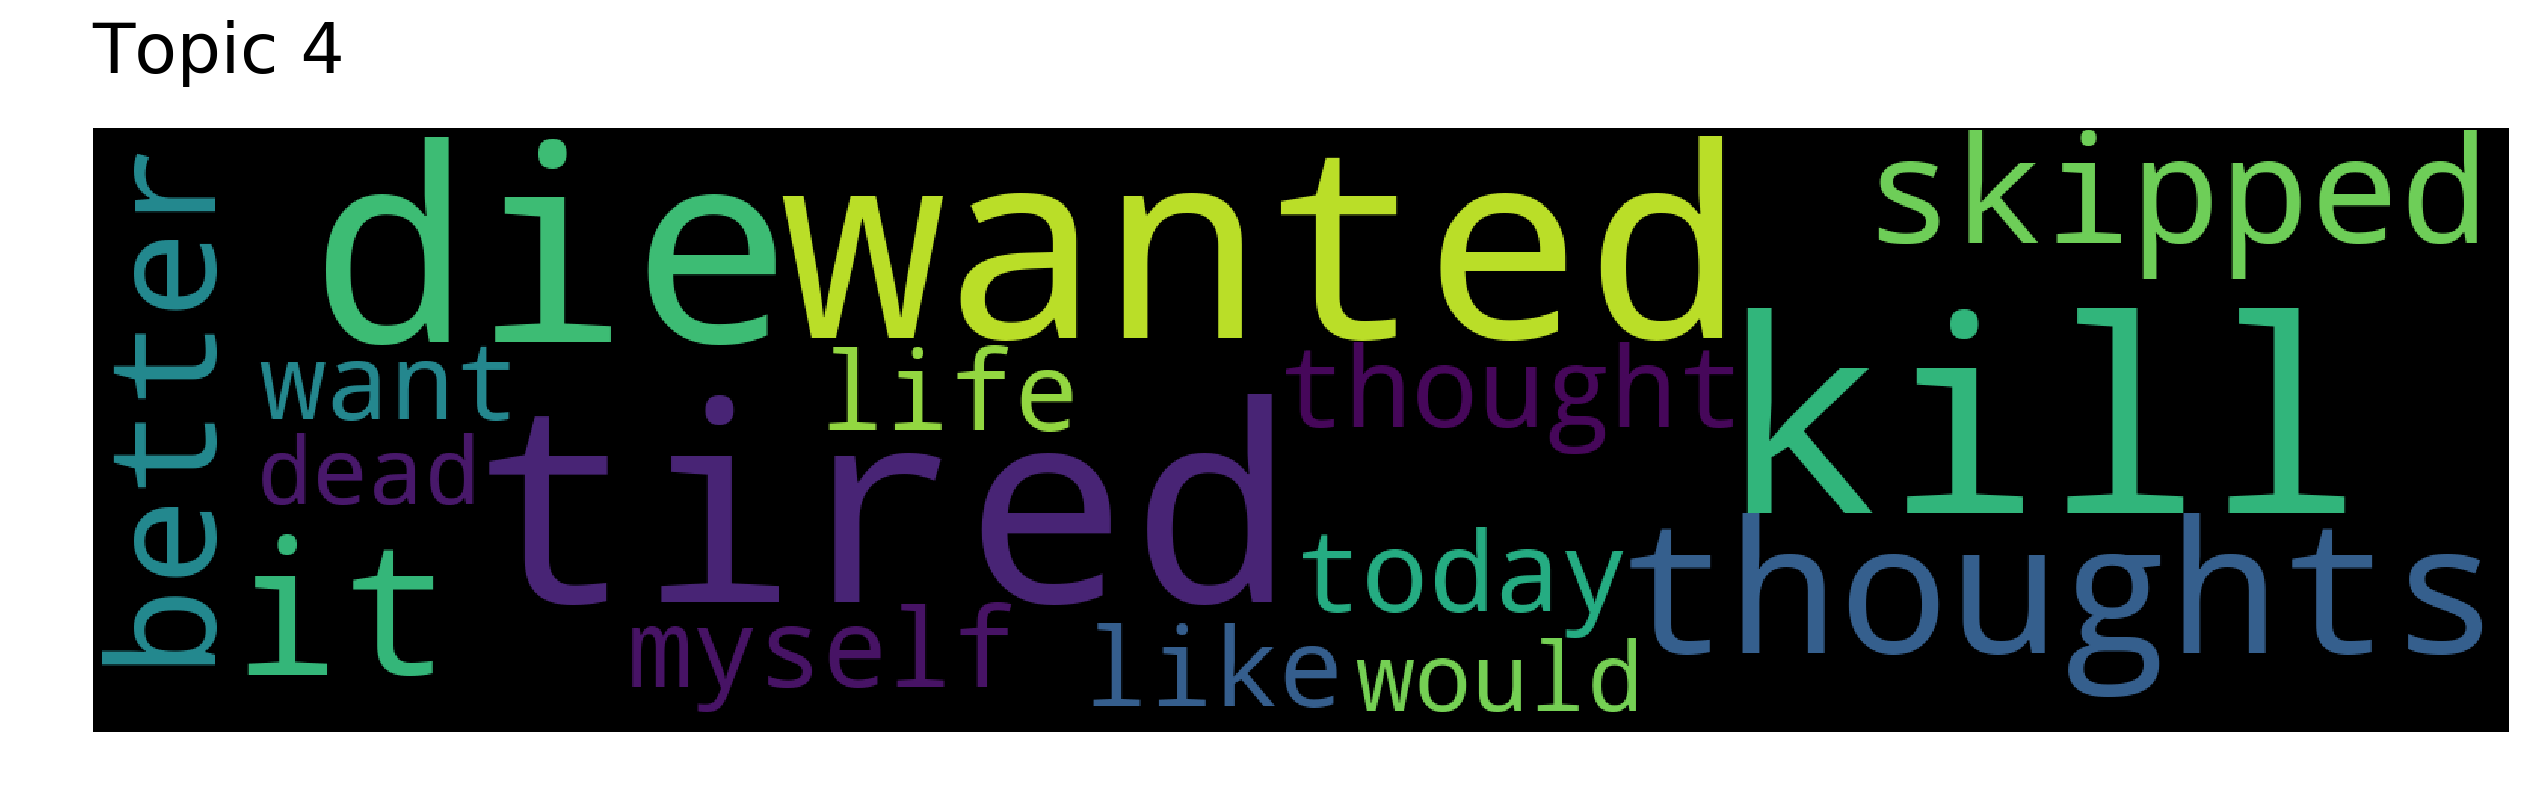

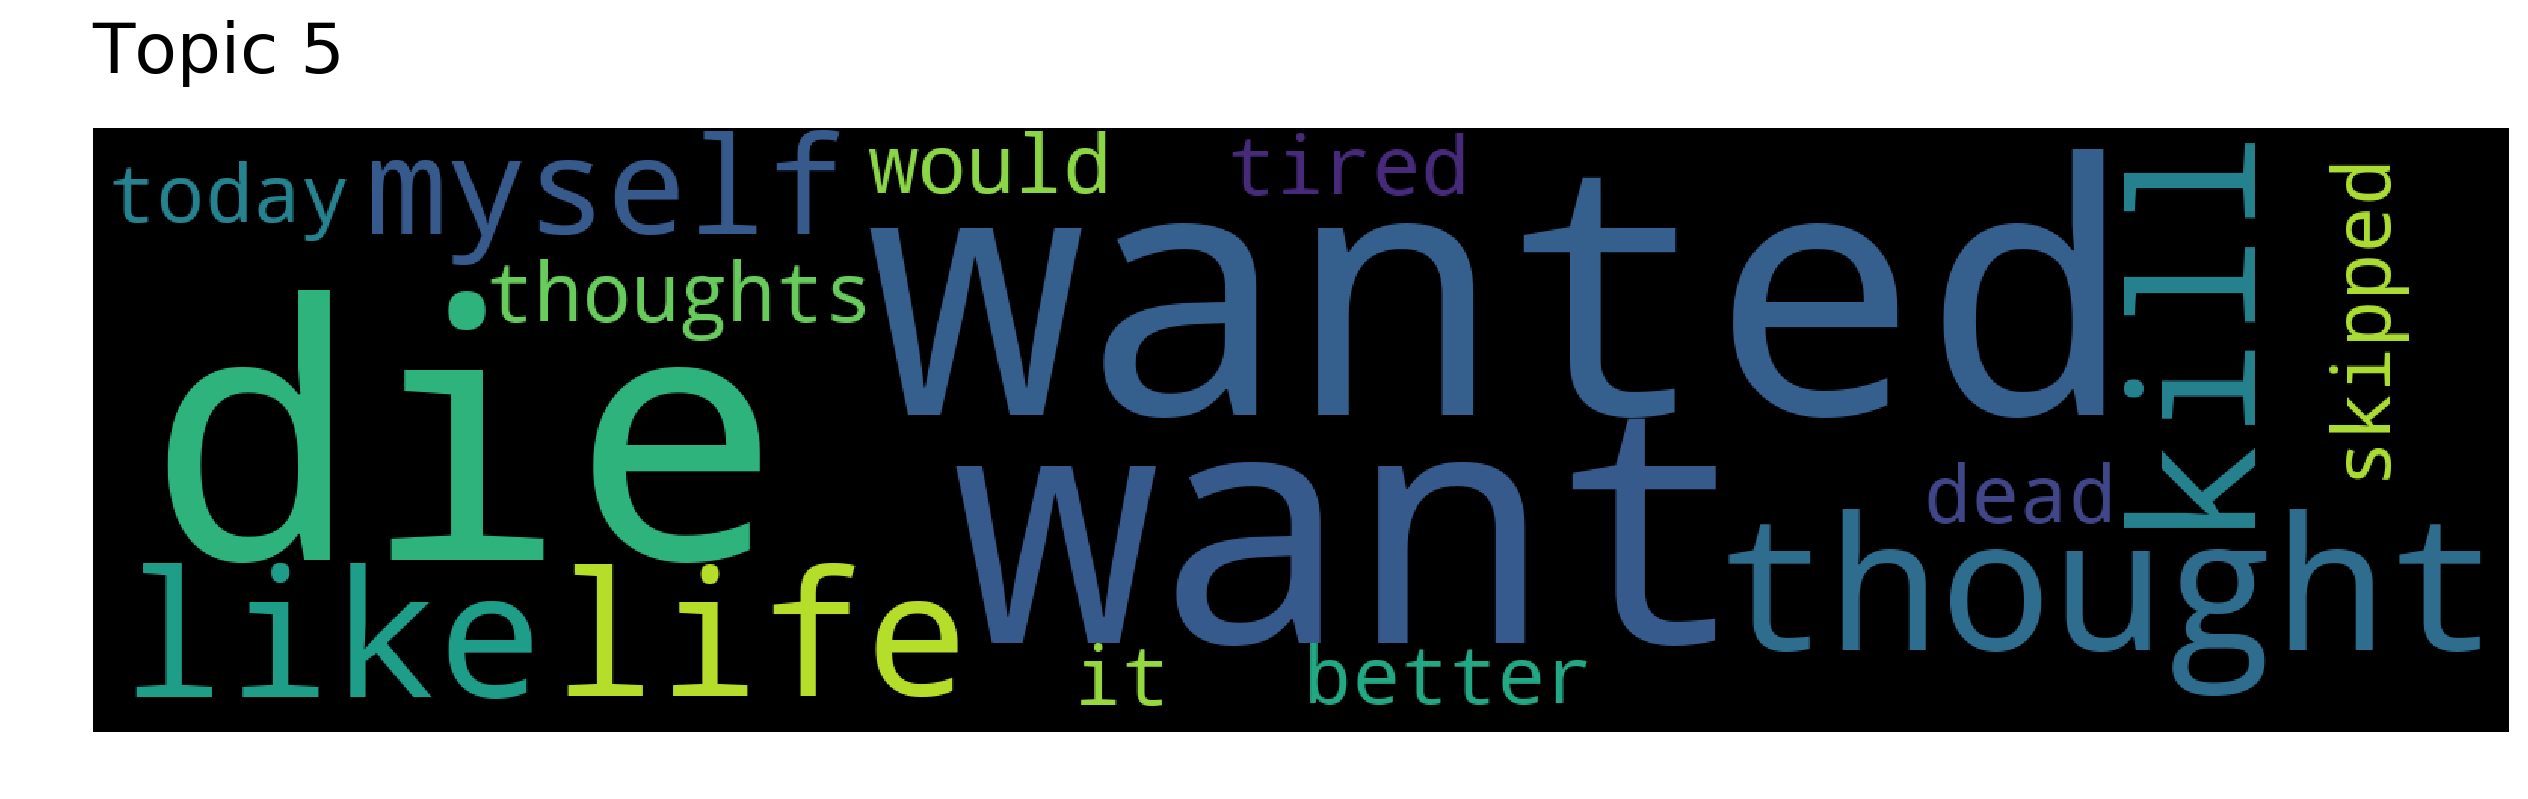

In [130]:
model.save("filename")
model = Top2Vec.load("filename")

num_topics = model.get_num_topics()
topic_sizes, topic_nums = model.get_topic_sizes()
print(num_topics, topic_sizes, topic_nums)

for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [136]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(
    keywords=["die"], 
    num_topics=num_topics)


In [137]:
topic_words

[array(['die', 'wanted', 'want', 'thought', 'like', 'life', 'kill',
        'myself', 'thoughts', 'it', 'would', 'tired', 'today', 'dead',
        'better', 'skipped'], dtype='<U8'),
 array(['tired', 'kill', 'die', 'wanted', 'thoughts', 'it', 'skipped',
        'better', 'thought', 'today', 'myself', 'like', 'life', 'want',
        'would', 'dead'], dtype='<U8'),
 array(['thoughts', 'kill', 'skipped', 'myself', 'thought', 'better',
        'tired', 'die', 'would', 'like', 'it', 'dead', 'want', 'wanted',
        'today', 'life'], dtype='<U8'),
 array(['would', 'kill', 'skipped', 'tired', 'thoughts', 'dead', 'life',
        'today', 'die', 'thought', 'wanted', 'like', 'want', 'it',
        'myself', 'better'], dtype='<U8'),
 array(['today', 'dead', 'myself', 'wanted', 'like', 'tired', 'better',
        'want', 'it', 'life', 'would', 'die', 'skipped', 'kill',
        'thoughts', 'thought'], dtype='<U8'),
 array(['life', 'dead', 'want', 'myself', 'tired', 'wanted', 'thought',
        'toda

In [140]:
topic_nums

array([5, 4, 2, 3, 0, 1])

In [147]:
topics_df = pd.DataFrame(topic_words)
         
topics_df['nums']=topic_nums
topics_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,nums
0,die,wanted,want,thought,like,life,kill,myself,thoughts,it,would,tired,today,dead,better,skipped,5
1,tired,kill,die,wanted,thoughts,it,skipped,better,thought,today,myself,like,life,want,would,dead,4
2,thoughts,kill,skipped,myself,thought,better,tired,die,would,like,it,dead,want,wanted,today,life,2
3,would,kill,skipped,tired,thoughts,dead,life,today,die,thought,wanted,like,want,it,myself,better,3
4,today,dead,myself,wanted,like,tired,better,want,it,life,would,die,skipped,kill,thoughts,thought,0
5,life,dead,want,myself,tired,wanted,thought,today,would,like,it,thoughts,die,better,skipped,kill,1


In [148]:
topics_df = pd.DataFrame(word_scores)
         
topics_df['nums']=topic_nums
topics_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,nums
0,0.149668,0.127894,0.122875,0.108008,0.066552,0.056401,0.053215,0.017444,-0.019408,-0.030059,-0.046491,-0.046519,-0.068922,-0.071025,-0.077751,-0.132426,5
1,0.087408,0.070493,0.065271,0.034005,0.015642,0.015255,0.008445,0.005017,0.004505,-0.004266,-0.026226,-0.028149,-0.030958,-0.056306,-0.077245,-0.094179,4
2,0.087455,0.077916,0.073664,0.045244,0.034875,0.031676,0.023494,0.020677,0.015386,-0.002855,-0.013899,-0.014242,-0.016280,-0.022774,-0.025944,-0.079966,2
3,0.058730,0.045319,0.042483,0.025977,0.024021,0.013694,0.009151,0.004234,-0.022961,-0.027592,-0.033840,-0.053480,-0.059076,-0.076716,-0.083365,-0.104021,3
4,0.062393,0.052461,0.042704,0.035929,0.033349,0.023708,0.008412,0.006512,-0.012019,-0.016133,-0.018545,-0.042897,-0.064317,-0.094788,-0.102052,-0.124824,0
5,0.108183,0.066509,0.052776,0.050507,0.040959,0.017287,0.010423,0.009961,0.007375,0.003168,-0.017858,-0.050575,-0.064249,-0.071283,-0.083077,-0.098177,1
